In [1]:
# imports
%pylab inline
import numpy.random as random
import scipy.stats as stats


Populating the interactive namespace from numpy and matplotlib


# Reviewing some things from before . . .

Set up two sets of 15 values from normal distributions, N(0,1) or N(1,1):

In [3]:
#initialize the arrays
ndata=15
data1=random.randn(ndata)
data2=random.randn(ndata)+1.

In [4]:
#find mean of each array
mean1=np.mean(data1)
mean2=np.mean(data2)

sigma1=np.std(data1,ddof=1)/np.sqrt(ndata) # want the standard deviation of the mean of data1
sigma2=np.std(data2,ddof=1)/np.sqrt(ndata) # want the standard deviation of the mean of data2


print(f'means: {mean1:.4f} , {mean2:.4f}')
print(f'sigmas: {sigma1:.4f} , {sigma2:.4f}')

tfactor=stats.t.ppf(1-0.025,ndata-1)
print(f'Confidence Interval for mean 1: [ {mean1-tfactor*sigma1:.4f} , {mean1+tfactor*sigma1:.4f} ]')
print(f'Confidence Interval for mean 2: [ {mean2-tfactor*sigma2:.4f} , {mean2+tfactor*sigma2:.4f} ]')


means: 0.0466 , 1.3033
sigmas: 0.2669 , 0.2672
Confidence Interval for mean 1: [ -0.5259 , 0.6191 ]
Confidence Interval for mean 2: [ 0.7302 , 1.8763 ]


Confidence intervals for the difference:

In [5]:
mean_diff=mean2-mean1
sigma_diff=np.sqrt(sigma1**2 + sigma2**2)
tfactor=stats.t.ppf(1-0.025, 2*ndata-2)

print(f'Observed difference of means: {mean_diff:.4f} ')

print(f'2-sided Confidence Interval: [ {mean_diff-tfactor*sigma_diff:.4f} , {mean_diff+tfactor*sigma_diff:.4f} ]')

tfactor=stats.t.ppf(1-0.05, 2*ndata-2)
print(f'1-sided Confidence Interval: > {mean_diff-tfactor*sigma_diff:.4f}')

Observed difference of means: 1.2567 
2-sided Confidence Interval: [ 0.4831 , 2.0304 ]
1-sided Confidence Interval: > 0.6143


# Permutation tests

We will combine `data1` and `data2` into 1 array; then generate sets of 2 datasets of size `ndata` and see how often their means differ as much as in the observed case.

In [12]:
# choose number of bootstrap samples
nsims=int(5E4)

# make a combined dataset from both original data arrays
datac=np.concatenate( (data1,data2) )

# generate the two bootstrap samples
fake1=np.random.choice(datac,size=(ndata,nsims) )
fake2=np.random.choice(datac,size=(ndata,nsims) )



## Application to means

In [8]:
# Calculate the means for each simulated dataset: should be nsims elements in each array
fakemeans1 = np.mean(fake1,axis=0)
fakemeans2 = np.mean(fake2,axis=0)

# Calculate the difference between the means
diffs=fakemeans2-fakemeans1  

__Using the below code box, plot histograms of the distributions of `fakemeans1` and `fakemeans2`, using the same binning and ~100 bins.__



__Using the below code box, plot a histogram of the distribution of differences between the means of each sample(`diffs`), using ~100 bins.  Add a vertical dashed line at the observed value of the difference between the means of the two data samples (`data1` and `data2`) (you can use `plt.axvline` for this).__

In [9]:
# print significance (alpha) = 0.32, 0.05, 0.01, and 0.001 limits on mean2-mean1
print(f'cutoffs: {np.percentile(diffs,(68.,95.,99.,99.9))}')

#make some empty space
print()

# compare the observed difference between the means to these cutoffs
print(f'Observed difference of means: {mean_diff:.4f} ')
print()

cutoffs: [0.20130398 0.70991996 1.0114838  1.33647695]

Observed difference of means: 1.2567 



We can get a p-value using `scipy.stats.percentileofscore(array,value)`, which returns the percentile in `array` corresponding to the observed value `value`.

In [10]:
print(f'p-value: {( 100-stats.percentileofscore(diffs,mean2-mean1) )/100.:.6g}')

p-value: 0.00174


## Application to standard deviations

We can also use the permutation test to investigate whether the ratio of standard deviations of the two samples could be different (note that each array by construction had the same intrinsic standard deviation, 1).

In [15]:
# calculate std. dev. of each bootstrap fake sample

fakesigmas1=np.std(fake1,axis=0,ddof=1)
fakesigmas2=np.std(fake2,axis=0,ddof=1)

ratio=fakesigmas2/fakesigmas1
realratio=np.std(data2,ddof=1)/np.std(data1,ddof=1)
realratio

1.0009749273633706

In [32]:
ratio

array([1.00972156, 1.47304339, 1.10503387, ..., 0.98310817, 1.30743309,
       0.7924466 ])

__Using the below code box, plot histograms of the two `fakesigmas` arrays, using ~100 bins each and the same binning.__

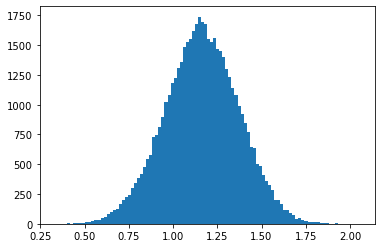

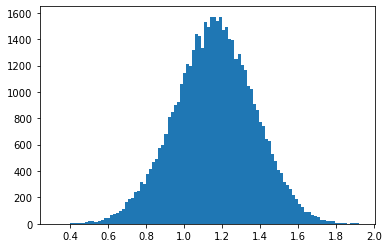

In [19]:
plt.hist(fakesigmas1,bins=100)
plt.show()
plt.hist(fakesigmas2,bins=100)
plt.show()

__Using the below code box, plot a histogram of the ratio of the two sigmas, i.e. `ratio=fakesigma2/fakesigma1`, with ~100 bins.  Put a vertical line at the observed value of the ratio calculated from `data1` and `data2`.__

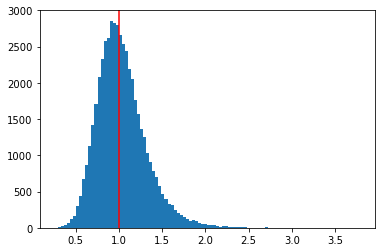

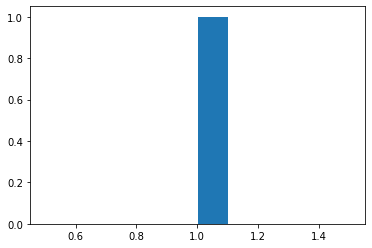

In [29]:
plt.hist(ratio,bins=100)
plt.axvline(realratio,color='red')
plt.show()
plt.hist(realratio)
plt.show()


__Using the below code box, determine the limits of the 68/95/99/99.9 percent regions (NOT the 68/95/99/99.9th percentile points, as we want a 2-sided test) for the value of this ratio, determined using the permutation tests.__ 

__Compare these limits to the observed value.  Also calculate the p-value of the observed value (again, keeping in mind that we want to do a 2-sided test, so we want to calculate the probability of anything either more extremely large or more extremely small under the hypothesis that there is no difference).__

__What do you conclude about whether the observed ratio of standard deviations is consistent with the hypothesis of no difference?__

In [38]:
# ??????

print(np.percentile(ratio, [2.5, 97.5]))

signif=0.5
t = stats.t.ppf(1-signif/2, 2*ndata-2)
print(t)




[0.58431502 1.69285423]
0.6796353449847025


# The Kolmogorov-Smirnov Test

Let's set up two sets of Poisson-distributed data, with mean 5 or 7.5, and see if we can detect differences.  

In [36]:
ndata = 25
countb = stats.poisson.rvs(5,size=(ndata) )
countr =stats.poisson.rvs(7.5,size=(ndata) )

__Use the below code box to bring up the help on `stats.ks_2samp`.__

__Evaluate whether the K-S test below finds a statistically significant difference between the two samples.__

In [37]:
d,p = stats.ks_2samp(countb,countr)
print(f'd value: {d:.4f} , p-value: {p:.6g}')

d value: 0.4000 , p-value: 0.0356114


# The Mann-Whitney U Test

__Use the below code box to bring up the help on `stats.mannwhitneyu`.__

In [39]:
stats.mannwhitneyu?

Signature: stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)
Docstring:
Compute the Mann-Whitney rank test on samples x and y.

Parameters
----------
x, y : array_like
    Array of samples, should be one-dimensional.
use_continuity : bool, optional
        Whether a continuity correction (1/2.) should be taken into
        account. Default is True.
alternative : {None, 'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is None):

      * None: computes p-value half the size of the 'two-sided' p-value and
        a different U statistic. The default behavior is not the same as
        using 'less' or 'greater'; it only exists for backward compatibility
        and is deprecated.
      * 'two-sided'
      * 'less': one-sided
      * 'greater': one-sided

    Use of the None option is deprecated.

Returns
-------
statistic : float
    The Mann-Whitney U statistic, equal to min(U for x, U for y) i

__Evaluate whether the U test below finds a statistically significant difference between the two samples.__

In [40]:
u,p = stats.mannwhitneyu(countb,countr)
print(f'U value: {u:.4f} , p-value: {p:.4g}')


U value: 195.5000 , p-value: 0.01132


# Optional: The chi-squared test



First, we need to make arrays containing histograms of the values from the two samples in bins of 2:

In [ ]:
#set up bins
bins=np.linspace(0,16,9)
# count objects in bins
histb,edges = np.histogram(countb,bins=bins)
histr,edges = np.histogram(countr,bins=bins)
histall,edges = np.histogram(np.concatenate((countb,countr)),bins=bins)

__Print out the values in all of the histograms using the above code box.__  Then, we will rescale the overall histogram to match the individual samples:

In [ ]:
# calculate expected # in each bin
predr=histall*0.5
predb=histall*0.5

__Plot separate histograms of the observed histograms (`histb` and `histr`) each overlaid with the predictions (`predb` or `predr`).__  Remember that you can use `plt.figure()` or `plt.subplot()` to make multiple plots from the same code box.  __Note:__ you can use the keyword 'drawstyle=steps' to make `plt.plot()` plot things histogram-style.

Now, it's time to calculate chi-squared.  We want to use only the non-zero bins.  __Fill in the calculation for the chi-squared for the blue objects.__

In [ ]:
wh_ok=np.where(histall > 0.)
chisq_red=np.sum( (histr[wh_ok]-predr[wh_ok])**2/predr[wh_ok] )
# Fix the below !!!!
chisq_blue=???


Now, let's calculate the total chi-squared and the number of degrees of freedom:

In [ ]:
print(f'Total chi-squared: {chisq_red+chisq_blue:.4f}')
print('# of bins: ', len(wh_ok[0]))
nsamples = 2
dof = (len(wh_ok[0])-1)*(nsamples - 1)

signif=0.05
print(f'chi-squared minimum for rejection: {stats.chi2.ppf(1-signif,dof):.4f}')
print(f'p-value: {(1-stats.chi2.cdf(chisq_red+chisq_blue,dof)):.4g} ')

### A problem: we used bins where the Poisson=Gaussian assumption is poor.

We need to restrict to only those bins where the predicted density is >5.  __Fix the code in the below box to only use those bins in the calculation.__

In [ ]:
# FIX THE BELOW LINE!
wh_ok=np.where(histall > 5.)
chisq_red=np.sum( (histr[wh_ok]-predr[wh_ok])**2/predr[wh_ok] )
chisq_blue=np.sum( (histb[wh_ok]-predb[wh_ok])**2/predr[wh_ok] )

print(f'Total chi-squared: {chisq_red+chisq_blue:.4f}')
print('# of bins: ', len(wh_ok[0]))
nsamples = 2
dof = (len(wh_ok[0])-1)*(nsamples - 1)

signif=0.05
print(f'chi-squared minimum for rejection: {stats.chi2.ppf(1-signif,dof):.4f}')
print(f'p-value: {(1-stats.chi2.cdf(chisq_red+chisq_blue,dof)):.4g} ')

### Note; using `stats.chi2_contingency`

`chi2_contingency` fails if any measurements in the 'contingency table' of results is zero, so we need to excise them.

In [ ]:
# identify the safe array elements to use with chi2_contingency
wh_ok=np.where((histb > 0) & (histr > 0))

# produce the `contingency table` of # of measurements in each category for each bin
obs=np.array([histb[wh_ok],histr[wh_ok]])

# calculate chi-squared & the resulting p-value
chi2,p,dof,expected = stats.chi2_contingency(obs)
print(f'Chi-squared: {chi2:.4f}, p-value: {p:.4g}, degrees of freedom: {dof}')